![](header.jpg)

# Simple Color Detection

Kevin J. Walchko, Phd

---

Here I make a simple pink racquetball finder. 

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [9]:
from collections import namedtuple
Target = namedtuple('Target', 'center radius')

In [10]:
def find_ball(img):
    """
    This converts a BGR image into HSV to help minimize lighting issues. If it finds a match
    then it returns a Target which holds the center mass and the radius.
    """
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    ballUpper = (330/2, .9*255, 1*250)
    ballLower = (290/2,  .6*255, .2*255)
    detect = cv2.inRange(hsv, ballLower, ballUpper)
    erode = cv2.erode(detect, None, iterations=5)
    dilate = cv2.dilate(erode, None, iterations=8)
    # cv2.imwrite("ball.jpg", dilate)

    # cv2.imshow('original', img)
    # cv2.imshow('dilate', dilate)
    cnts = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]
    ret = None
    if cnts:
        print('Found {} objects'.format(len(cnts)))
        # find the largest contour in the mask, then use
        # it to compute the minimum enclosing circle and
        # centroid
        c = max(cnts, key=cv2.contourArea)
        ((x, y), radius) = cv2.minEnclosingCircle(c)
        x, y, radius = int(x), int(y), int(radius)
        ret = Target((x,y), (radius))
        # print('Circle center: ({}, {})   radius: {} pixels'.format(x, y, radius))
    return ret

In [4]:
# unfortunately, jupyter does not handle video. So we are just going to 
# test this one image at a time
cam = cv2.VideoCapture(0)

In [14]:
# grab an image
ok, img = cam.read()

Found 1 objects


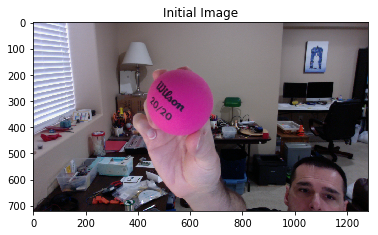

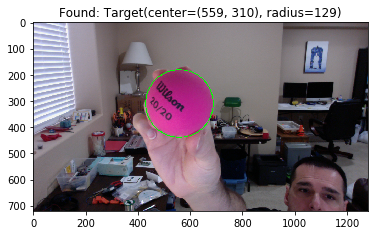

In [20]:
# If image grab is successful, then find the ball. 
if ok:
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(rgb)
    plt.title("Initial Image")
    ans = find_ball(img)
    
    if ans:
        cv2.circle(rgb,ans.center,ans.radius,(0,255,0),2)
        plt.figure()
        plt.imshow(rgb)
        plt.title("Found: {}".format(ans))
else:
    print("crap")

In [21]:
cam.release()